# Visualización

En esta fase Visualizaremos los resultados de nuestro análisis, además de obtener conclusiones por cada gráfica que obtengamos

In [38]:
# Manipulación de DataFrames
# -----------------------------------------------------------------------
import pandas as pd                             # Manipulación y análisis de datos en estructuras DataFrame
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import seaborn as sns
# Ignorar warings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Evolución Anual del Precio Promedio por Servicio (2019-2022)

In [128]:
df1 = pd.read_csv("../datos/06_TablasPreVisualizacion/01_evolucion_anual_precio_promedio_por_categoria.csv")

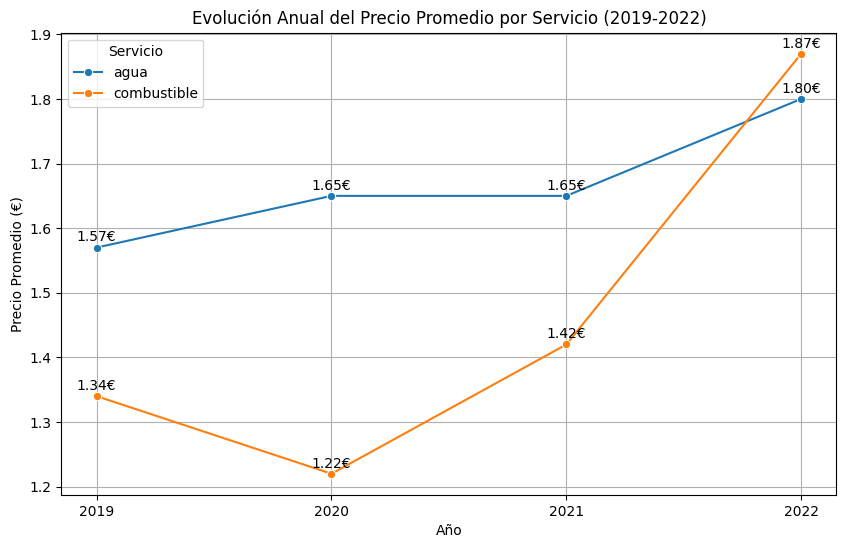

In [99]:
df_agua_gasolina = df1[df1['categoria'].isin(['agua', 'combustible'])]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agua_gasolina, x='anio', y='precio_promedio', hue='categoria', marker='o')
plt.xticks(df_agua_gasolina['anio'].unique().astype(int))
plt.title('Evolución Anual del Precio Promedio por Servicio (2019-2022)')
plt.xlabel('Año')
plt.ylabel('Precio Promedio (€)')
plt.legend(title='Servicio')
for x, y, label in zip(df_agua_gasolina['anio'], df_agua_gasolina['precio_promedio'], df_agua_gasolina['precio_promedio']):
    plt.text(x, y + 0.005, f"{label:.2f}€", ha='center', va='bottom')
plt.grid()
plt.show()

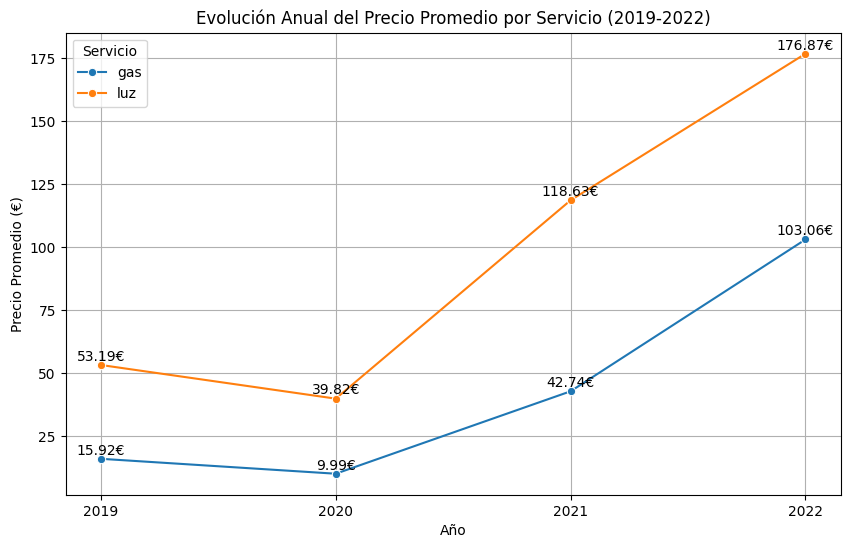

In [95]:
df_gas_luz = df1[df1['categoria'].isin(['gas', 'luz'])]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_gas_luz, x='anio', y='precio_promedio', hue='categoria', marker='o')
plt.xticks(df_gas_luz['anio'].unique().astype(int))
plt.title('Evolución Anual del Precio Promedio por Servicio (2019-2022)')
plt.xlabel('Año')
plt.ylabel('Precio Promedio (€)')
plt.legend(title='Servicio')
for x, y, label in zip(df_gas_luz['anio'], df_gas_luz['precio_promedio'], df_gas_luz['precio_promedio']):
    plt.text(x, y + 0.5, f"{label:.2f}€", ha='center', va='bottom')
plt.grid()
plt.show()

# Variación Mensual del Precio Promedio por Servicio

In [42]:
df2 = pd.read_csv("../datos/06_TablasPreVisualizacion/02_variacion_mensual_precio_por_categoria.csv")

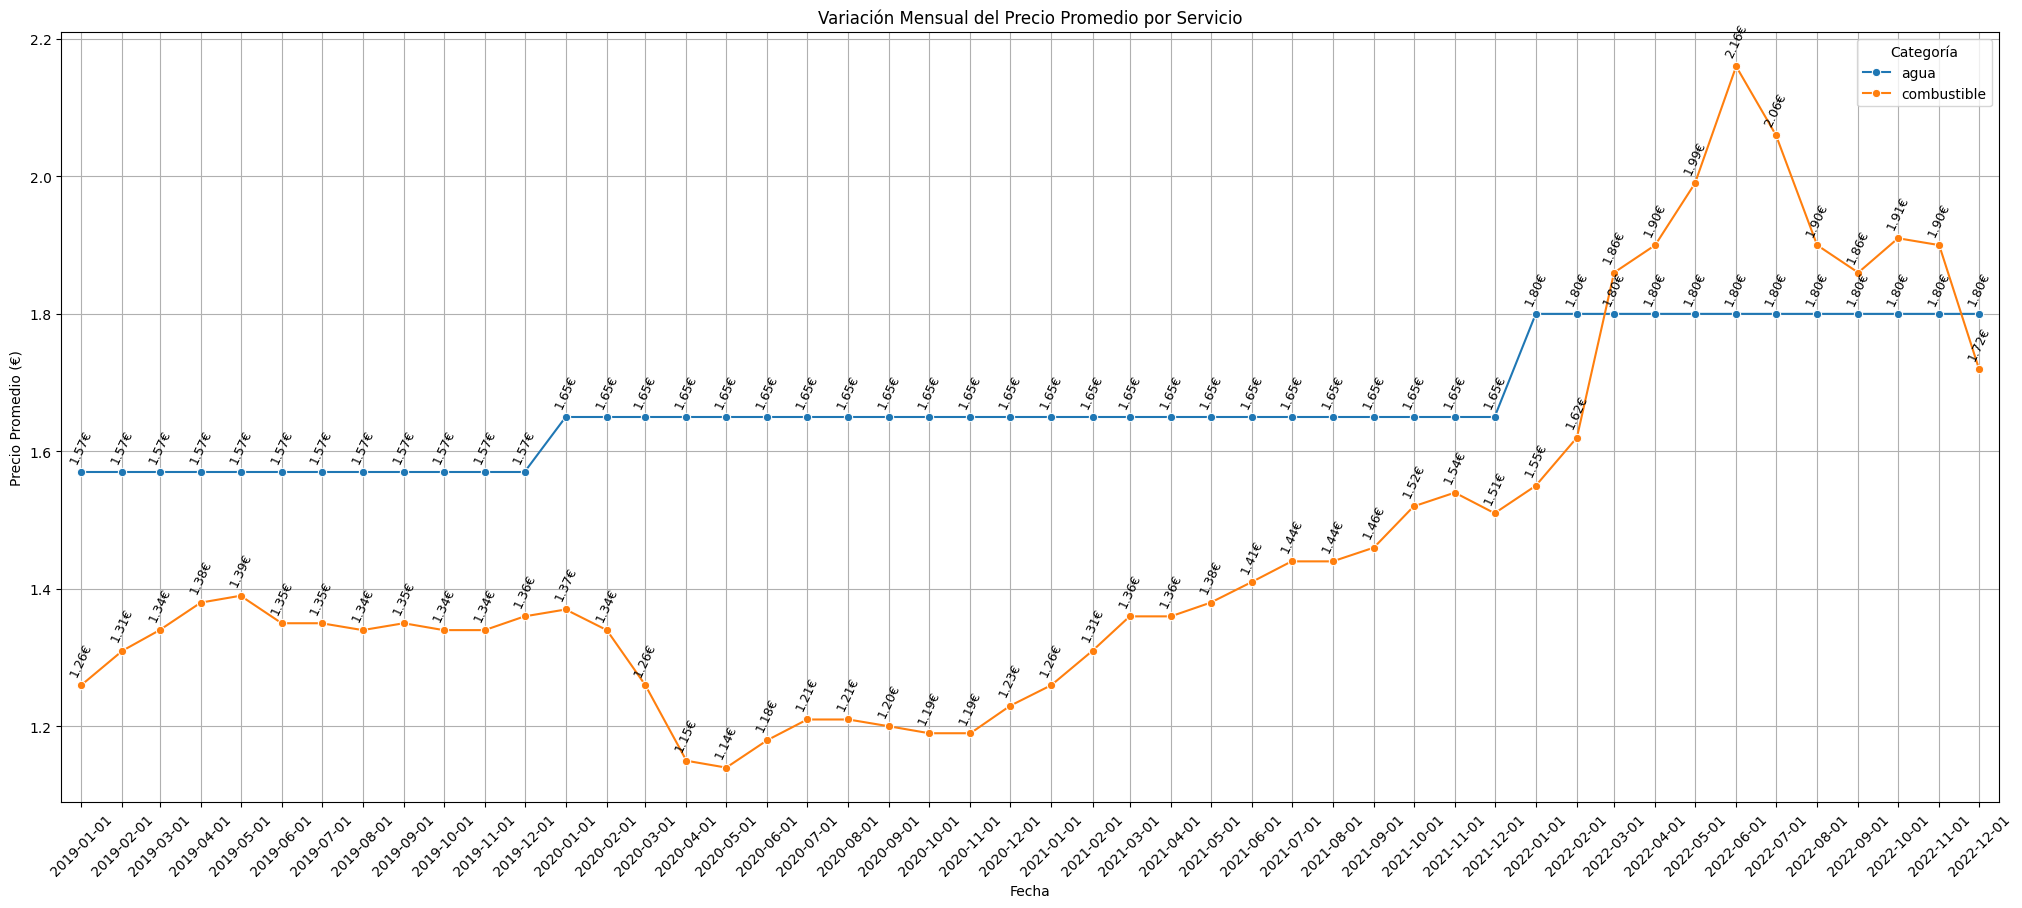

In [211]:
df_agua_gasolina = df2[df2['categoria'].isin(['agua', 'combustible'])]
df_agua_gasolina['fecha'] = pd.to_datetime(df_agua_gasolina['fecha'])
plt.figure(figsize=(25, 10))
plot = sns.lineplot(data=df_agua_gasolina, x='fecha', y='precio_promedio', hue='categoria', marker='o')
plt.title('Variación Mensual del Precio Promedio por Servicio')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (€)')
plt.legend(title='Categoría')
plt.xticks(df_agua_gasolina['fecha'].dt.to_period("M").drop_duplicates().dt.to_timestamp(), rotation=45)
for x, y, label in zip(df_agua_gasolina['fecha'], df_agua_gasolina['precio_promedio'], df_agua_gasolina['precio_promedio']):
    plt.text(x, y + 0.01, f"{label:.2f}€", ha='center', va='bottom', fontsize=9,rotation=65)

padding_days = pd.Timedelta(days=15)
plt.xlim(df_agua_gasolina['fecha'].min() - padding_days, df_agua_gasolina['fecha'].max() + padding_days)
plt.ylim(df_agua_gasolina['precio_promedio'].min() - 0.05, df_agua_gasolina['precio_promedio'].max() + 0.05)
plt.grid()
plt.show()


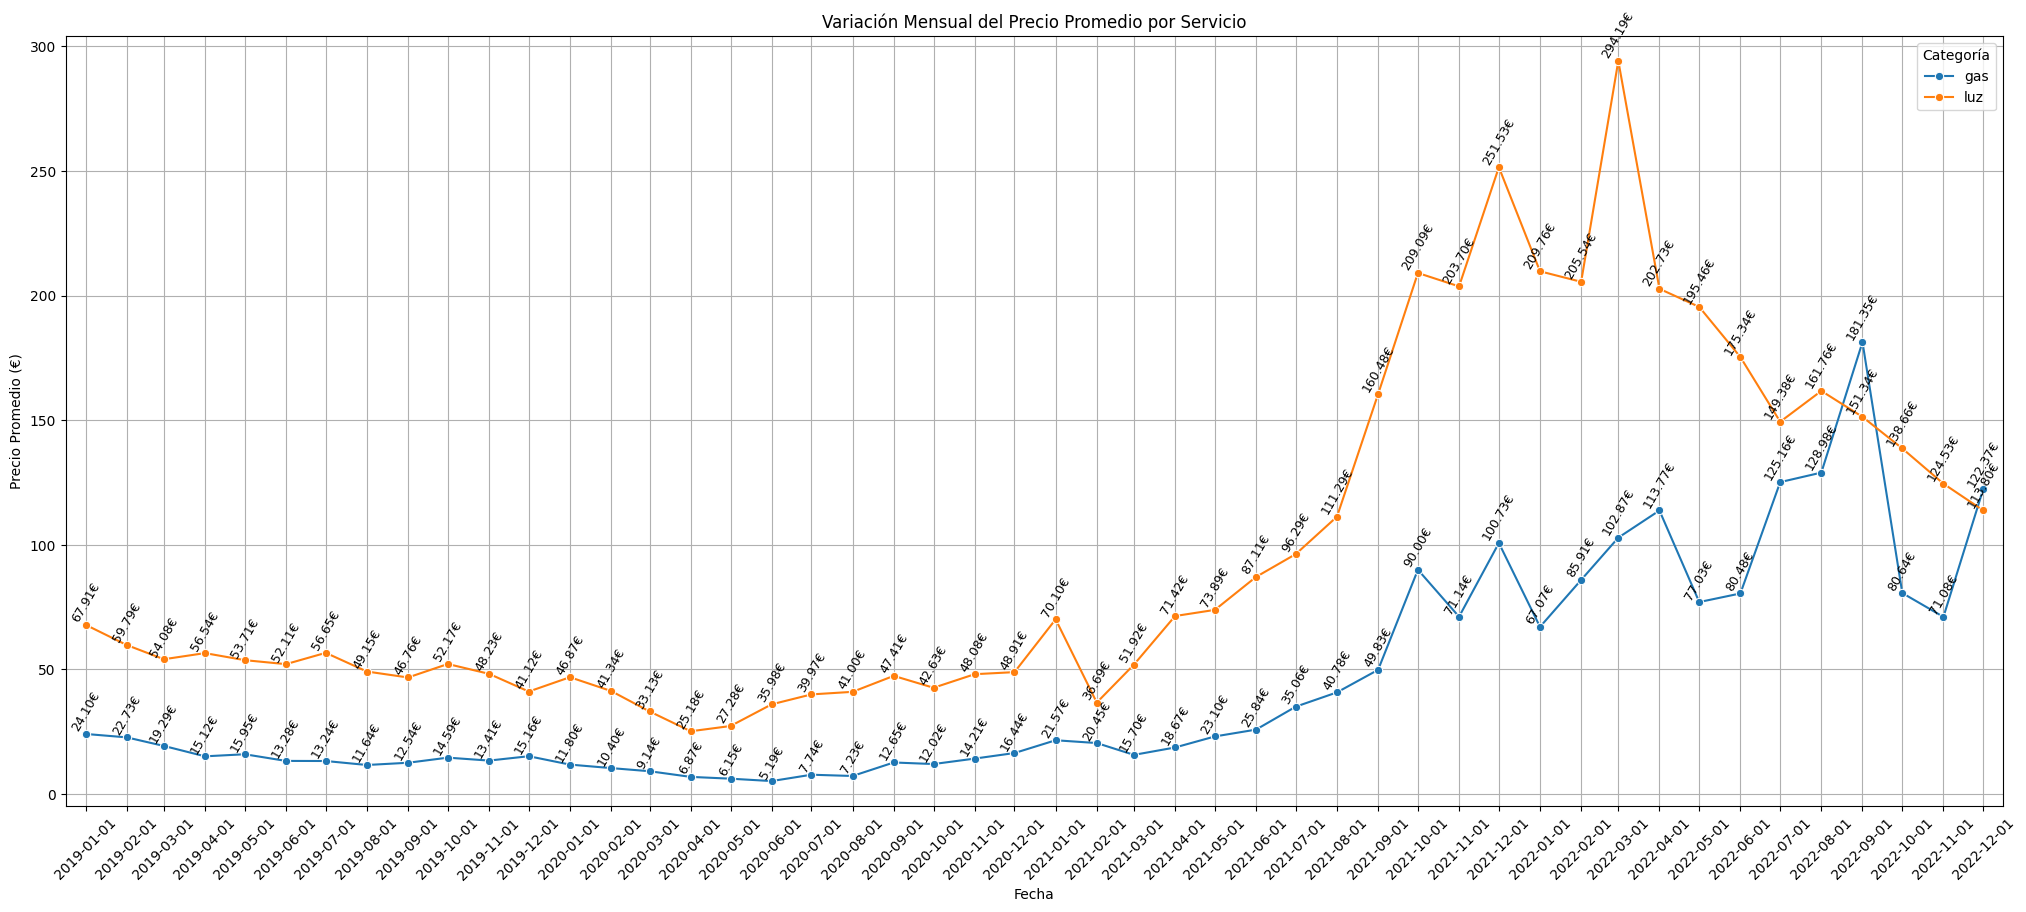

In [209]:
df_gas_luz = df2[df2['categoria'].isin(['gas', 'luz'])]
df_gas_luz['fecha'] = pd.to_datetime(df_gas_luz['fecha'])
plt.figure(figsize=(25, 10))
plot = sns.lineplot(data=df_gas_luz, x='fecha', y='precio_promedio', hue='categoria', marker='o')
plt.title('Variación Mensual del Precio Promedio por Servicio')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (€)')
plt.legend(title='Categoría')
plt.xticks(df_gas_luz['fecha'].dt.to_period("M").drop_duplicates().dt.to_timestamp(), rotation=45)
for x, y, label in zip(df_gas_luz['fecha'], df_gas_luz['precio_promedio'], df_gas_luz['precio_promedio']):
    plt.text(x, y + 0.1, f"{label:.2f}€", ha='center', va='bottom', fontsize=9,rotation=60)

padding_days = pd.Timedelta(days=15)
plt.xlim(df_gas_luz['fecha'].min() - padding_days, df_gas_luz['fecha'].max() + padding_days)
plt.ylim(df_gas_luz['precio_promedio'].min() - 10, df_gas_luz['precio_promedio'].max() + 10)
plt.grid()
plt.show()

# Variación Mensual Luz

In [129]:
df3 = pd.read_csv("../datos/06_TablasPreVisualizacion/03_variacion_mensual_luz.csv")

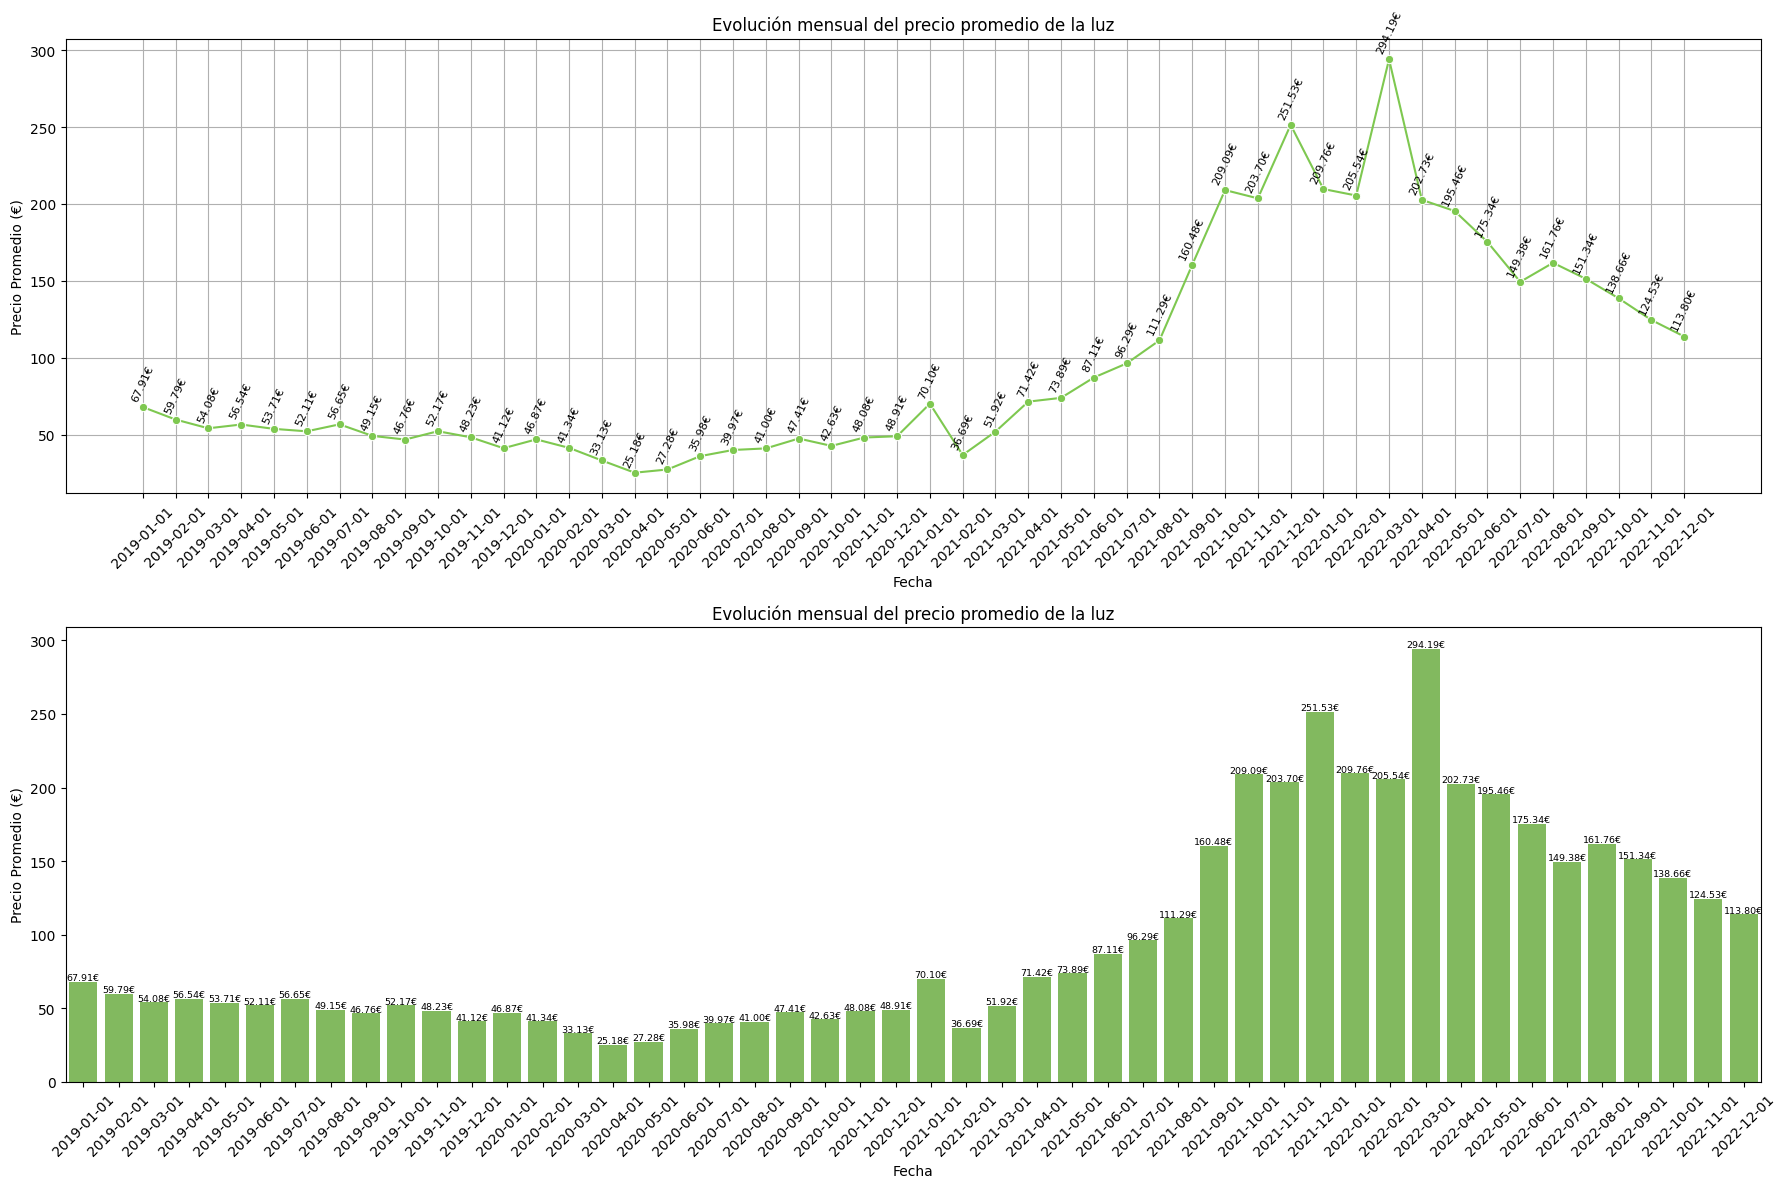

In [204]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
sns.lineplot(data=df3, x='fecha', y='precio_promedio', marker='o', color="#7ec850", ax=axes[0])
axes[0].set_title("Evolución mensual del precio promedio de la luz")
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Precio Promedio (€)")
axes[0].tick_params(axis='x', rotation=45)
for x, y in zip(df3['fecha'], df3['precio_promedio']):
    axes[0].text(x, y + 4, f'{y:.2f}€', ha='center',fontsize=8,rotation=65)
sns.barplot(data=df3, x='fecha', y='precio_promedio', color="#7ec850", ax=axes[1])
axes[1].set_title("Evolución mensual del precio promedio de la luz")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("Precio Promedio (€)")
axes[1].tick_params(axis='x', rotation=45)
for index, row in df3.iterrows():
    axes[1].text(index, row['precio_promedio'] + 1, f"{row['precio_promedio']:.2f}€", ha='center',fontsize=6.8)
axes[0].grid()
plt.tight_layout()
plt.show()


# Variacion Mensual Gas

In [156]:
df4 = pd.read_csv("../datos/06_TablasPreVisualizacion/04_variacion_mensual_gas.csv")

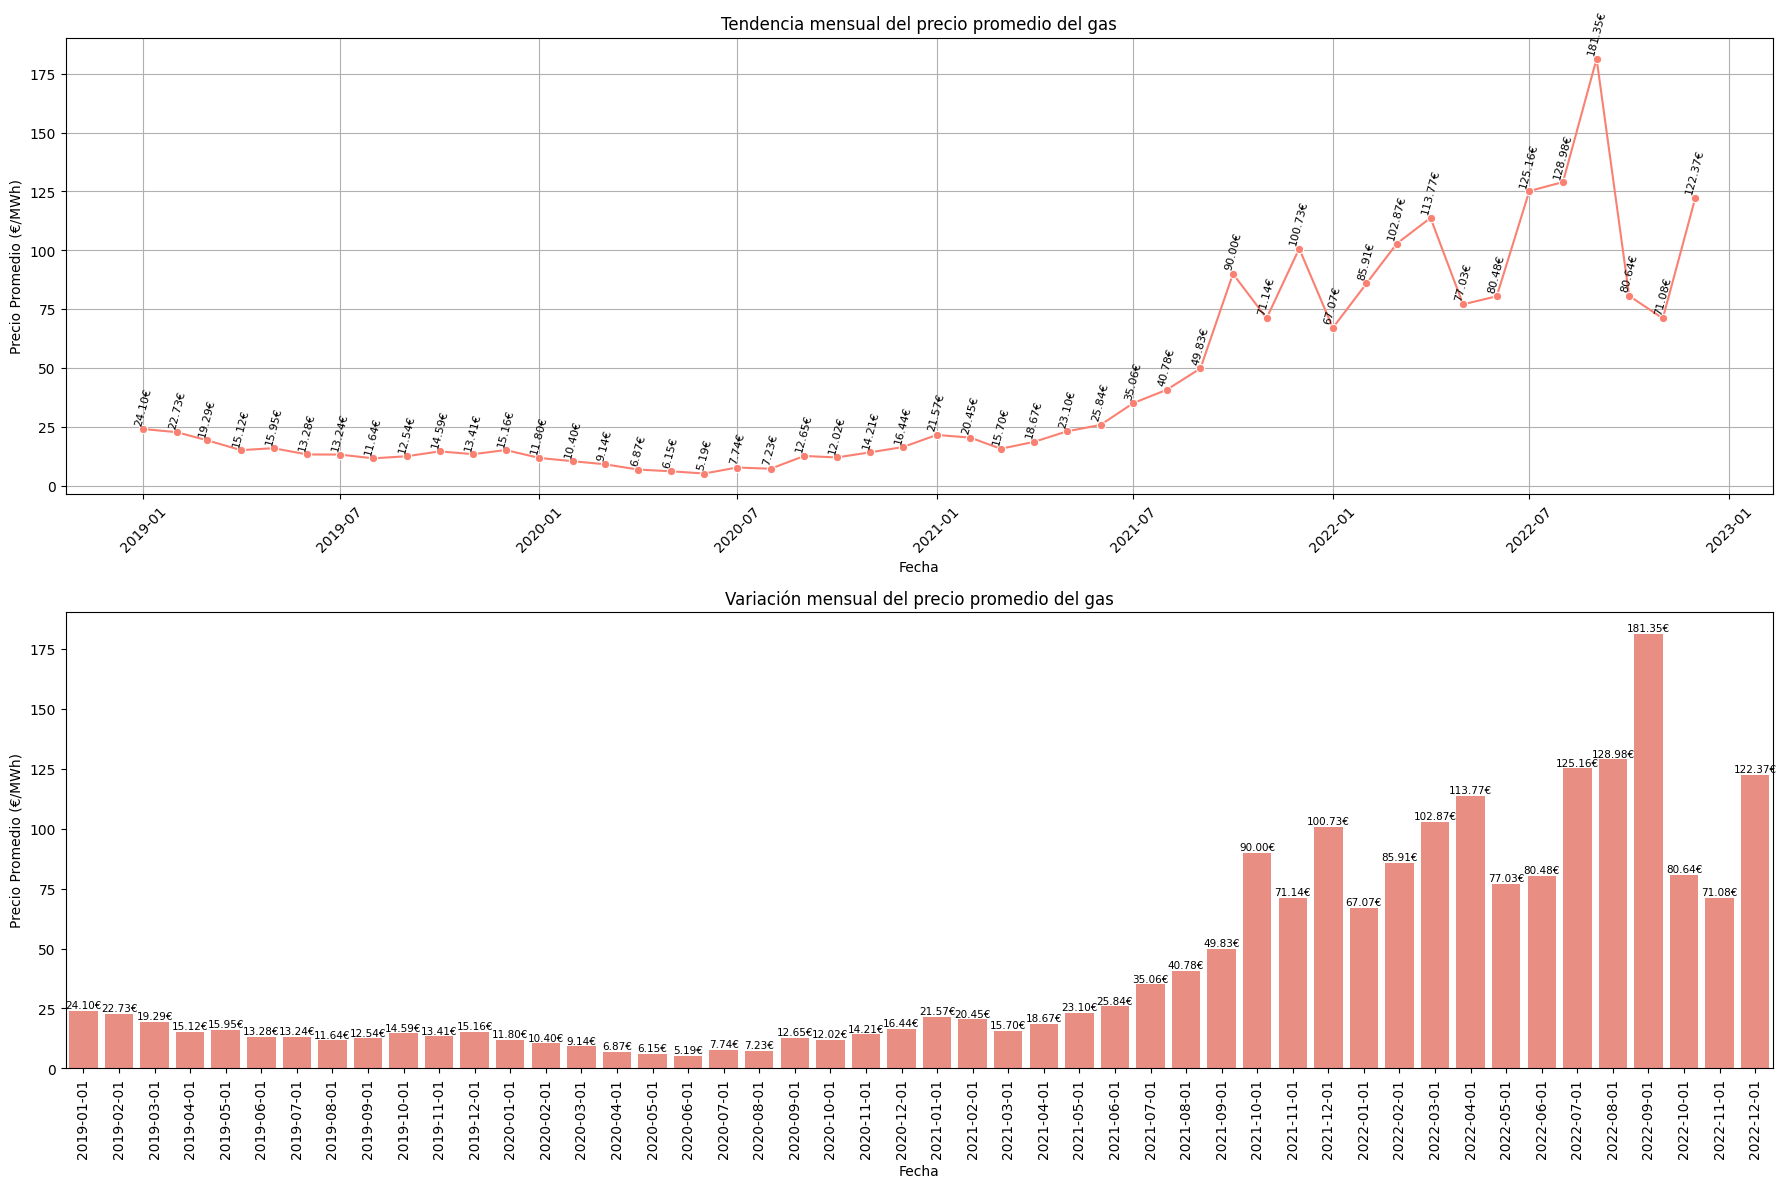

In [200]:
df4['fecha'] = pd.to_datetime(df4['fecha'])
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
sns.lineplot(data=df4, x='fecha', y='precio_promedio', marker='o', color="salmon", ax=axes[0])
axes[0].set_title("Tendencia mensual del precio promedio del gas")
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Precio Promedio (€/MWh)")
axes[0].tick_params(axis='x', rotation=45)
for x, y in zip(df4['fecha'], df4['precio_promedio']):
    axes[0].text(x, y + 2, f'{y:.2f}€', ha='center',fontsize=8,rotation=75)
sns.barplot(data=df4, x='fecha', y='precio_promedio', color="salmon", ax=axes[1])
axes[1].set_title("Variación mensual del precio promedio del gas")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("Precio Promedio (€/MWh)")
axes[1].tick_params(axis='x', rotation=90)
for index, row in df4.iterrows():
    axes[1].text(index, row['precio_promedio'] + 1, f"{row['precio_promedio']:.2f}€", ha='center',fontsize=7.5)
axes[0].grid()
plt.tight_layout()
plt.show()


# Variacion Mensual Combustible

In [178]:
df5 = pd.read_csv("../datos/06_TablasPreVisualizacion/05_variacion_mensual_precio_combustible.csv")

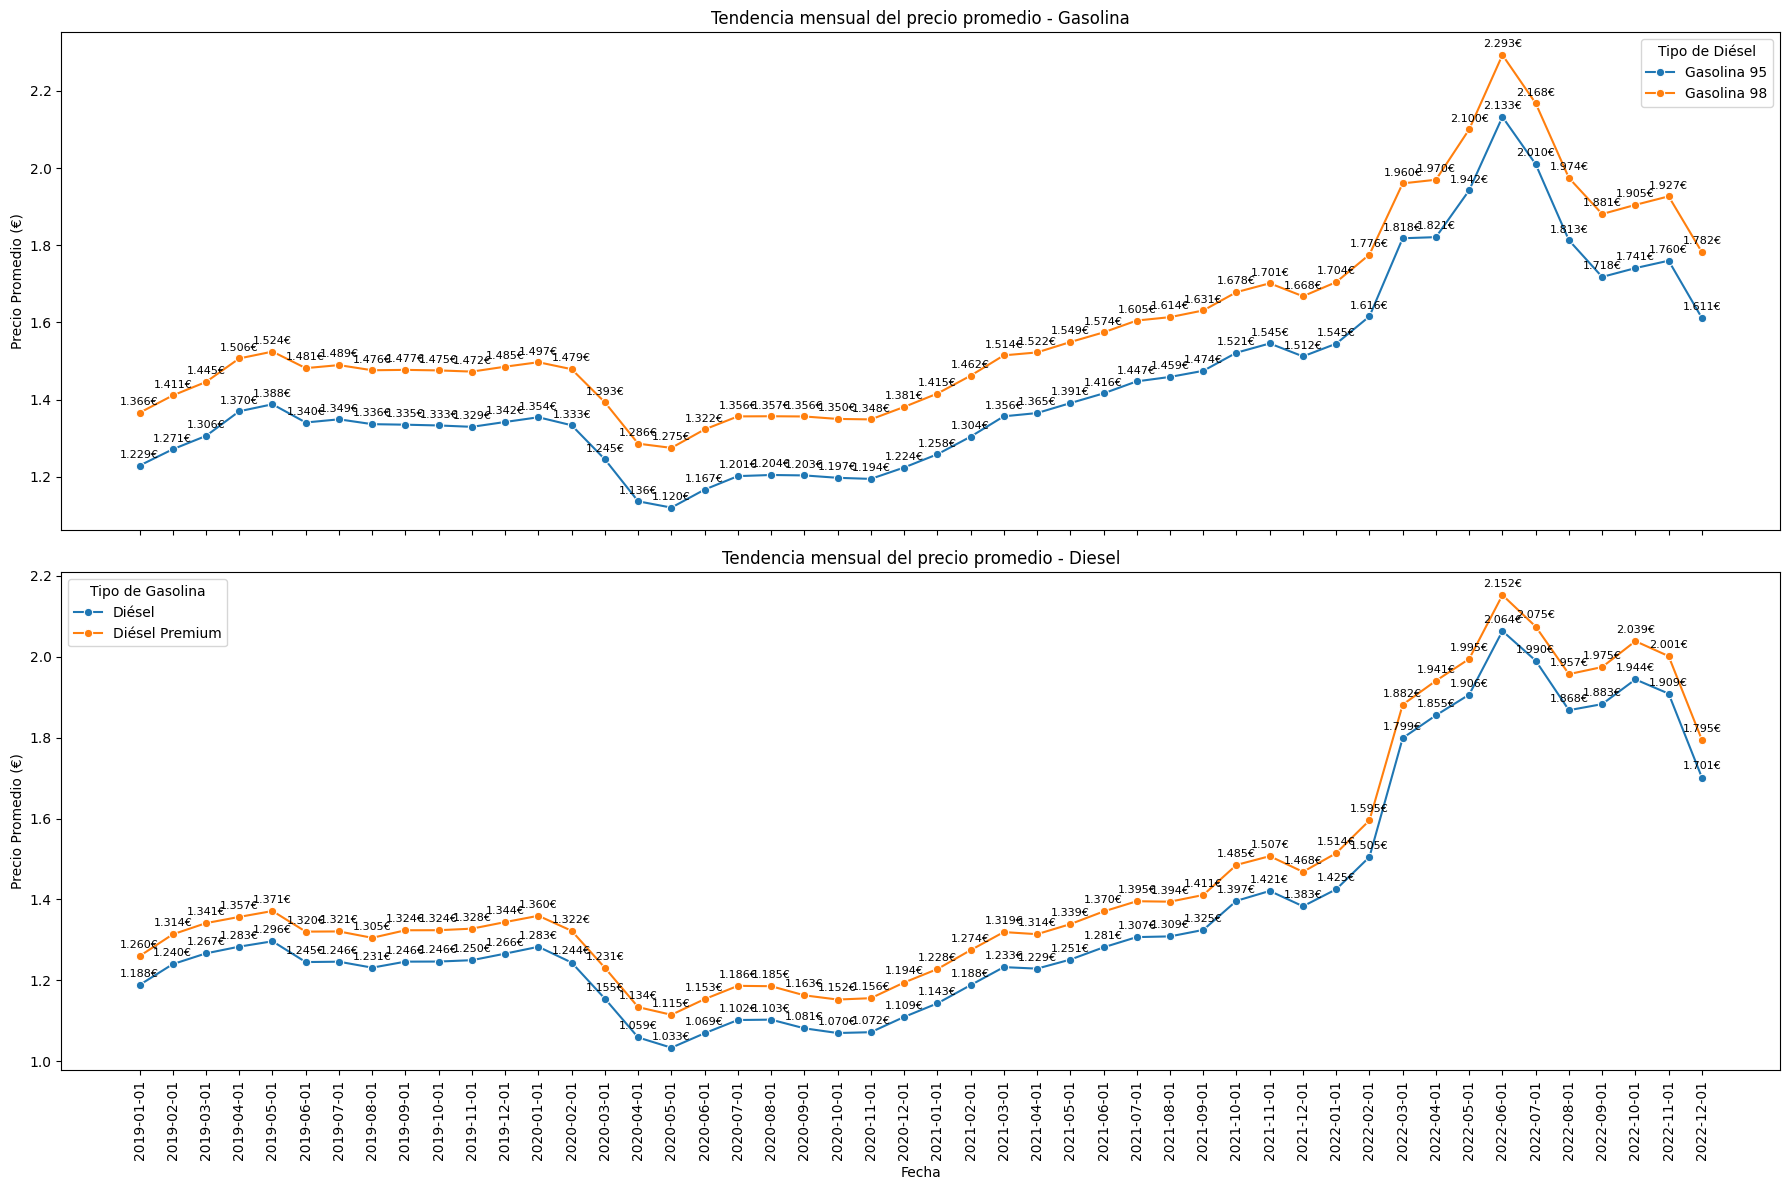

In [220]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)
diesel_data = df5[df5['combustible'].str.contains('Diésel', case=False)]
gasolina_data = df5[df5['combustible'].str.contains('Gasolina', case=False)]

# Gráfico de línea para Diéseles
sns.lineplot(data=gasolina_data, x='fecha', y='precio_promedio', hue='combustible', marker='o', ax=axes[0])
axes[0].set_title("Tendencia mensual del precio promedio - Gasolina")
axes[0].set_xlabel("")
axes[0].set_ylabel("Precio Promedio (€)")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="Tipo de Diésel")

# Agregar etiquetas de los valores encima de los puntos para Diéseles
for x, y, label in zip(gasolina_data['fecha'], gasolina_data['precio_promedio'], gasolina_data['combustible']):
    axes[0].text(x, y + 0.02, f'{y:.3f}€', ha='center', fontsize=8)

# Gráfico de línea para Gasolinas
sns.lineplot(data=diesel_data, x='fecha', y='precio_promedio', hue='combustible', marker='o', ax=axes[1])
axes[1].set_title("Tendencia mensual del precio promedio - Diesel")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("Precio Promedio (€)")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="Tipo de Gasolina")

# Agregar etiquetas de los valores encima de los puntos para Gasolinas
for x, y, label in zip(diesel_data['fecha'], diesel_data['precio_promedio'], diesel_data['combustible']):
    axes[1].text(x, y + 0.02, f'{y:.3f}€', ha='center', fontsize=8)

plt.tight_layout()
plt.show()



# Variacion Mensual Agua

In [132]:
df6 = pd.read_csv("../datos/06_TablasPreVisualizacion/06_variacion_mensual_agua.csv")

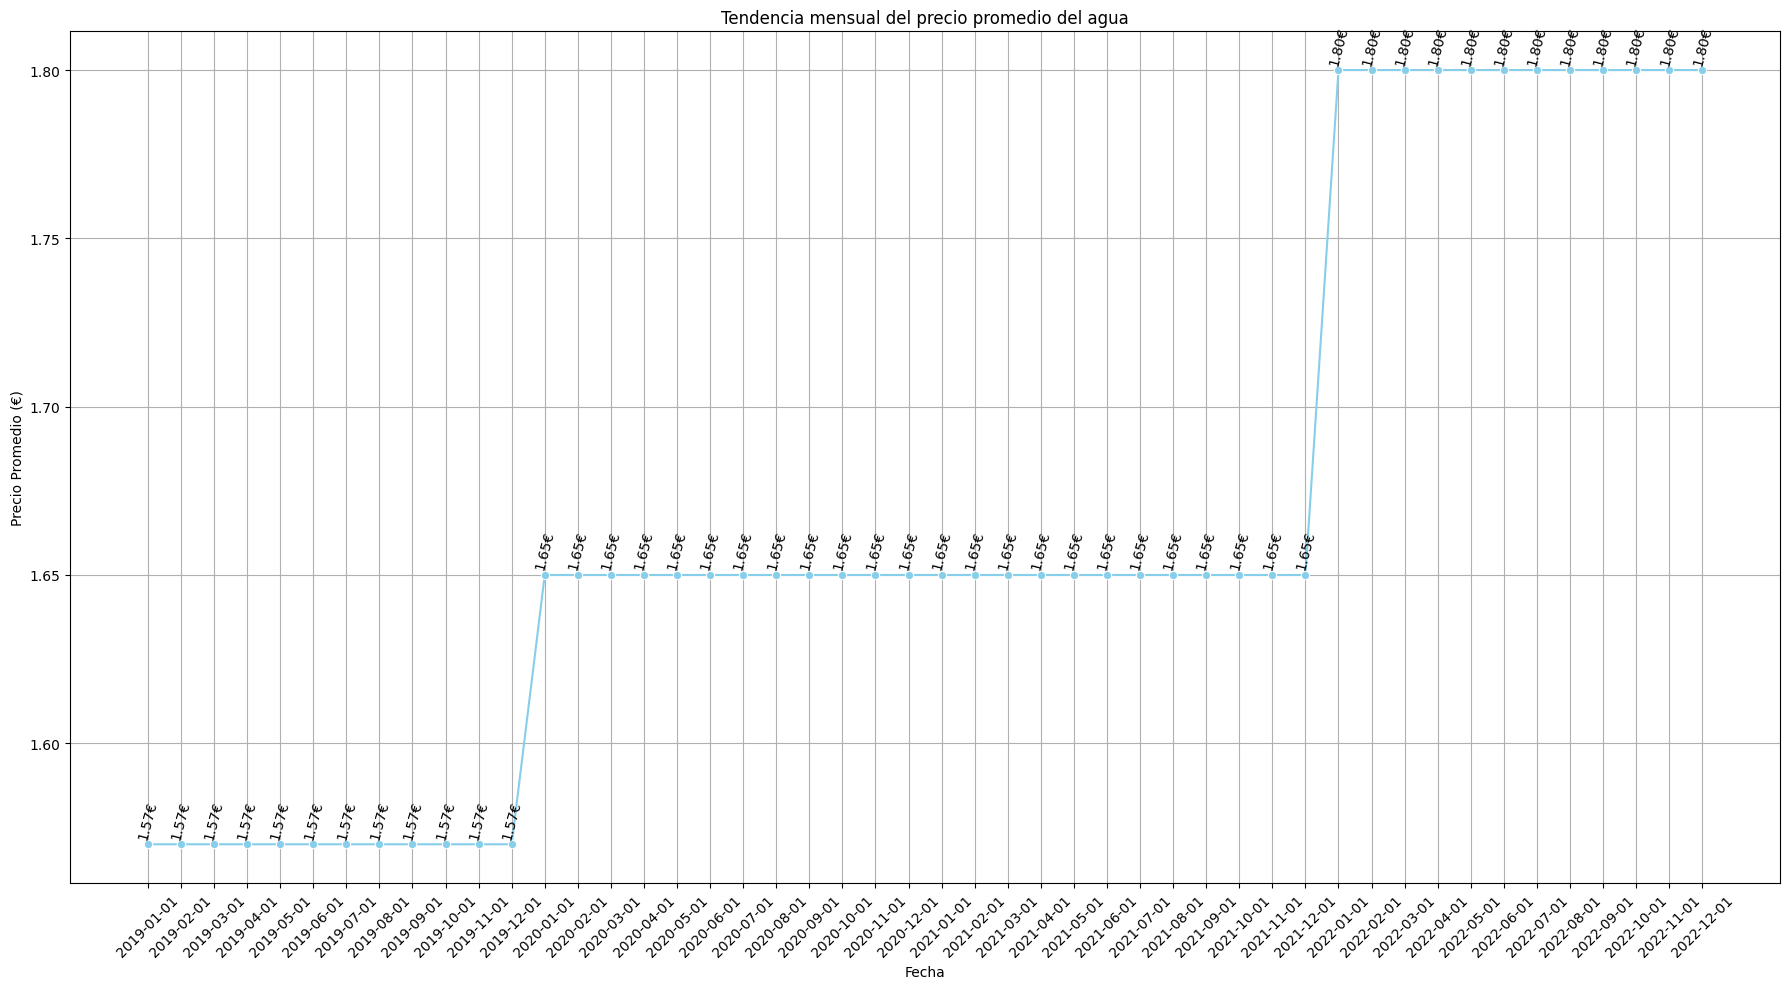

In [202]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=df6, x='fecha', y='precio_promedio', marker='o', color="skyblue")
plt.title("Tendencia mensual del precio promedio del agua")
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)
for x, y in zip(df6['fecha'], df6['precio_promedio']):
    plt.text(x, y + 0.002, f'{y:.2f}€', ha='center',rotation=75)
plt.tight_layout()
plt.grid()
plt.show()
